In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
path = "outputs/"
filename = "batch_profiling_results_red_cuda_20240912_103609.csv"
df = pd.read_csv(path+filename)

In [17]:
grouped_df = df.groupby(['model_alias', 'batch_size']).mean().reset_index()
grouped_df

,model_alias,batch_size,processing_time,throughput
0,gemma-7b,1,0.819844,2.1460
1,gemma-7b,2,0.938293,2.1310
2,gemma-7b,3,0.972221,3.0990
3,gemma-7b,4,1.014708,3.9570
4,gemma-7b,6,1.105608,5.4610
5,gemma-7b,7,1.259443,5.5780
6,gemma-7b,11,1.336429,8.2720
7,gemma-7b,13,1.648316,7.9640
8,gemma-7b,16,1.941014,8.5530
9,gemma-7b,23,2.482561,9.5710


In [18]:
grouped_df.loc[:,"processing_time_std"] = df.groupby(['model_alias', 'batch_size']).std().reset_index()["processing_time"]
grouped_df.loc[:,"throughput_std"] = df.groupby(['model_alias', 'batch_size']).std().reset_index()["throughput"]

In [8]:
grouped_df

,model_alias,batch_size,processing_time,throughput,processing_time_std,throughput_std
0,gemma-7b,1,0.819844,2.1460,0.259599,3.272889
1,gemma-7b,2,0.938293,2.1310,0.018882,0.043063
2,gemma-7b,3,0.972221,3.0990,0.065324,0.201850
3,gemma-7b,4,1.014708,3.9570,0.067815,0.262300
4,gemma-7b,6,1.105608,5.4610,0.096728,0.436538
5,gemma-7b,7,1.259443,5.5780,0.080875,0.341754
6,gemma-7b,11,1.336429,8.2720,0.103136,0.620337
7,gemma-7b,13,1.648316,7.9640,0.169123,0.827475
8,gemma-7b,16,1.941014,8.5530,0.422417,1.620501
9,gemma-7b,23,2.482561,9.5710,0.484423,1.760760


In [19]:
grouped_df.to_csv("results/batch_profiling_results_red_cuda_grouped.csv", index=False)

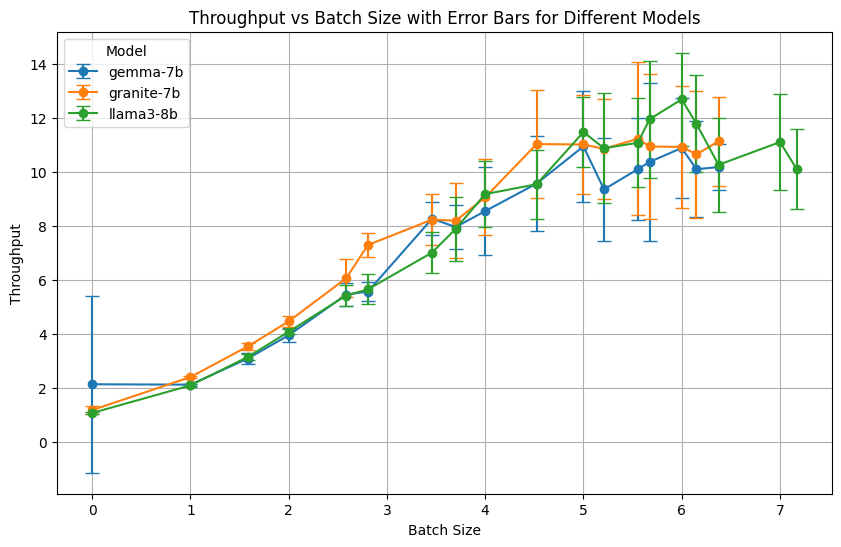

In [20]:
plt.figure(figsize=(10, 6))

# Group data by model alias
grouped = grouped_df.groupby('model_alias')

# Plot for each model
for model, group in grouped:
    plt.errorbar(np.log2(group['batch_size']), group['throughput'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5)

# Set plot labels and title
plt.xlabel('Batch Size')
plt.ylabel('Throughput')
plt.title('Throughput vs Batch Size with Error Bars for Different Models')
plt.legend(title='Model')
plt.grid(True)

# Show the plot
plt.show()